In [156]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [157]:
df = pd.read_csv('/home/smayan/Desktop/DJS-compute-tasks/DJS-compute-tasks/Task 2/Data/automobile_data.csv')
# df = pd.read_csv('/workspaces/DJS-compute-tasks/Task 2/Data/automobile_data.csv')

In [158]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [159]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [160]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

* **This does not necessarily mean that there are no null values, they might be in a different format.**

In [161]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [162]:
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [163]:
df['num-of-doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [164]:
df[df['num-of-doors'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,?,mazda,diesel,std,?,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


* **Here the '?' signifies null values which need to be managed.**

In [165]:
df.shape

(205, 26)

In [166]:
df.replace('?', np.nan, inplace=True)

* **Replacing all instances of '?' with NaN values which can be managed easily**

In [167]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [168]:
columns_checking = ['normalized-losses','num-of-doors','bore','stroke','horsepower','peak-rpm','price']

def null_pecentage(df, columns):
    result={}
    for col in columns:
        if col in df.columns:
            null_percentage = (df[col].isnull().sum() / len(df)) * 100
            result[col] = round(null_percentage, 2)
        else:
            result[col] = "Column not found"
    return result

null_percentage = null_pecentage(df, columns_checking)

for column, percentage in null_percentage.items():
    if isinstance(percentage, float):
        print(f"{column}: {percentage}%")
    else:
        print(f"{column}: {percentage}")
    

normalized-losses: 20.0%
num-of-doors: 0.98%
bore: 1.95%
stroke: 1.95%
horsepower: 0.98%
peak-rpm: 0.98%
price: 1.95%


* **Here the null percentage for rows of columns other than normalized-losses are very low, so the rows can be dropped safely**

In [169]:
df.dropna(subset = ['num-of-doors','bore','stroke','horsepower','peak-rpm','price'], inplace=True)

In [170]:
df.isnull().sum()

symboling             0
normalized-losses    34
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [171]:
df['normalized-losses'] = df['normalized-losses'].astype(float)

In [172]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,193.000000,159.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.797927,121.132075,98.923834,174.326425,65.893782,53.869948,2561.507772,128.124352,10.143627,25.326425,30.787565
std,1.235582,35.651285,6.152409,12.478593,2.137795,2.394770,526.700026,41.590452,3.977491,6.387828,6.816910
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,98.000000,8.500000,19.000000,25.000000
50%,1.000000,113.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,9.000000,25.000000,30.000000
75%,2.000000,148.000000,102.400000,184.600000,66.900000,55.700000,2952.000000,146.000000,9.400000,30.000000,34.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [173]:
list = [df['normalized-losses'].mean(), df['normalized-losses'].median(), df['normalized-losses'].mode()]
list

[121.13207547169812,
 113.0,
 0    161.0
 Name: normalized-losses, dtype: float64]

* **The most appropriate way to fill in the null values is filling with the mean value.**

In [174]:
df['normalized-losses'] = df['normalized-losses'].fillna(df['normalized-losses'].mean())

In [175]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

* **It is confirmed that now the dataframe has 0 null values.**

In [176]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [177]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,121.132075,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,121.132075,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,121.132075,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


* **Now mapping the categorical values appropriately.**

In [178]:
df['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [179]:
df['num-of-doors']=df['num-of-doors'].map({'two' : 2, 'four' : 4})

In [180]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'eight'], dtype=object)

In [181]:
df['num-of-cylinders']=df['num-of-cylinders'].map({'six' : 6, 'four' : 4, 'five' :5, 'three':3,'twelve':12,'eight': 8})

In [182]:
df[['bore','stroke','horsepower','peak-rpm','price','num-of-doors','num-of-cylinders']] = df[['bore','stroke','horsepower','peak-rpm','price','num-of-doors','num-of-cylinders']].astype(float)

* **Converting the object numeric values into float values.**

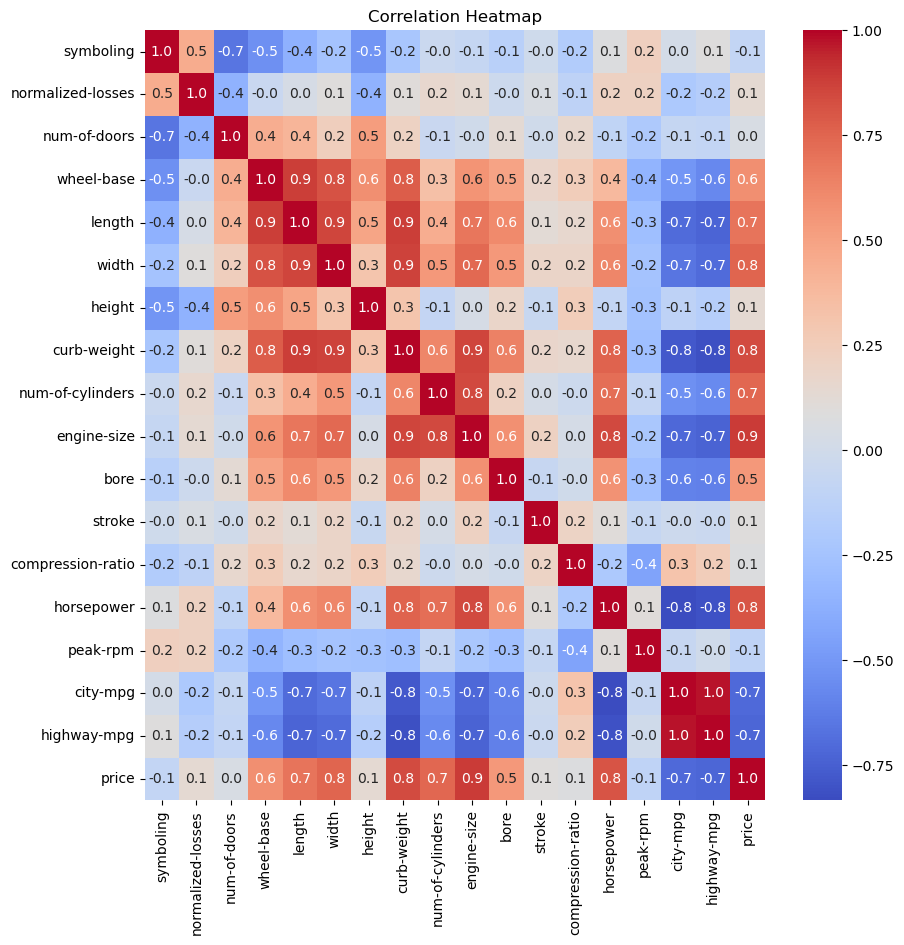

In [183]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1f', cmap='coolwarm').set(title='Correlation Heatmap')
plt.show()

In [184]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

* **From the above correlation graph we can see that Symboling, normalized losses, number of doors, height, stroke, compression ratio and peak rpm do not have much correlation with price, so it is safe to drop them for the model**

In [185]:
df.drop(columns=['symboling', 'normalized-losses','num-of-doors', 'height', 'stroke', 'compression-ratio', 'peak-rpm'], inplace=True)

In [186]:
df.columns

Index(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'curb-weight',
       'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
       'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [187]:
df.dtypes

make                 object
fuel-type            object
aspiration           object
body-style           object
drive-wheels         object
engine-location      object
wheel-base          float64
length              float64
width               float64
curb-weight           int64
engine-type          object
num-of-cylinders    float64
engine-size           int64
fuel-system          object
bore                float64
horsepower          float64
city-mpg              int64
highway-mpg           int64
price               float64
dtype: object

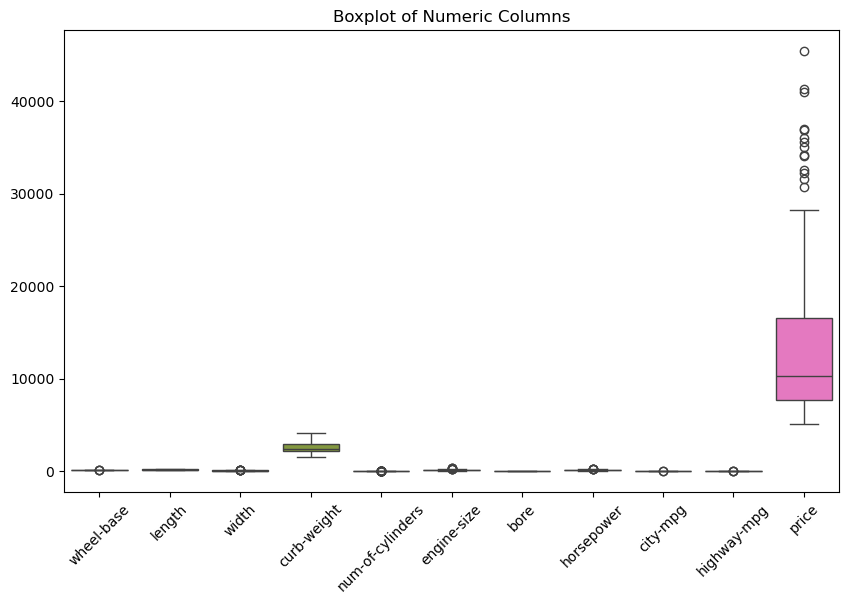

In [188]:
numeric_columns = df.select_dtypes(include=[float, int]).columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Columns')
plt.show()


* **Here it is seen that price has a lot of outliers, so they will be managed by mapping them to the upper limit defined below.**

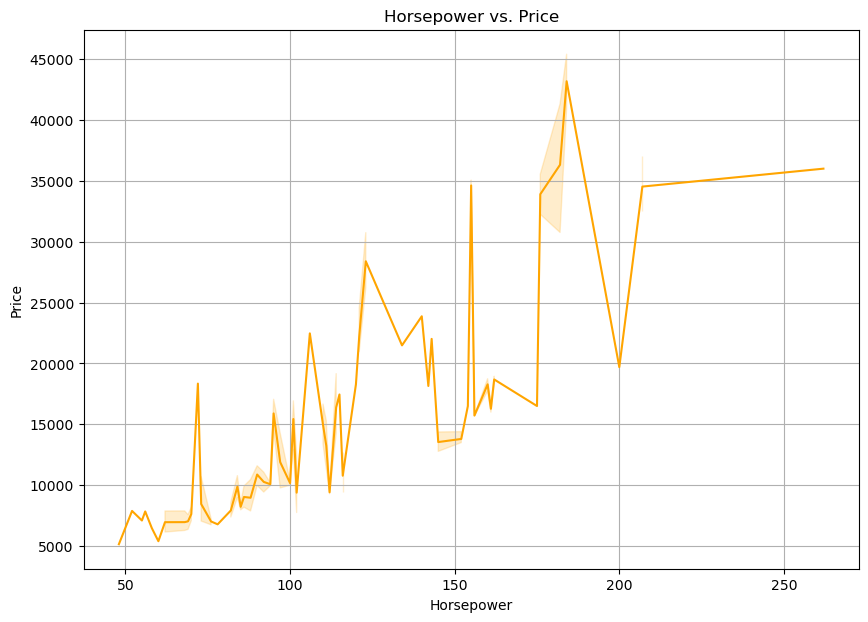

In [189]:
plt.figure(figsize=(10, 7))
sns.lineplot(x='horsepower', y='price', data=df, color='orange')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Horsepower vs. Price')
plt.grid(True)
plt.show()

* **Distribution is uneven but can be said that price increases and horsepower increases**

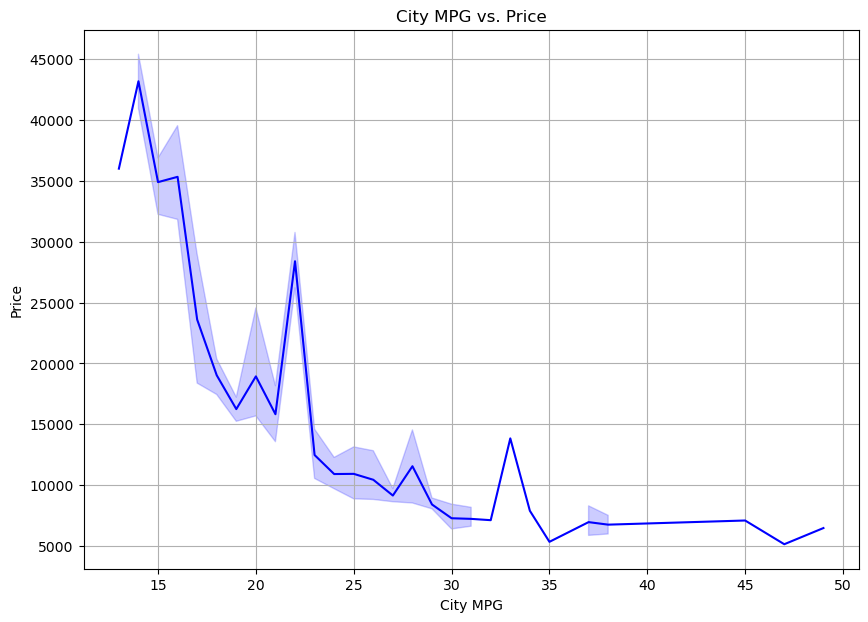

In [190]:
plt.figure(figsize=(10, 7))
sns.lineplot(x='city-mpg', y='price', data=df, color='b')
plt.xlabel('City MPG')
plt.ylabel('Price')
plt.title('City MPG vs. Price')
plt.grid(True)
plt.show()

* **For some reason cars with lesser price have better city milages.**

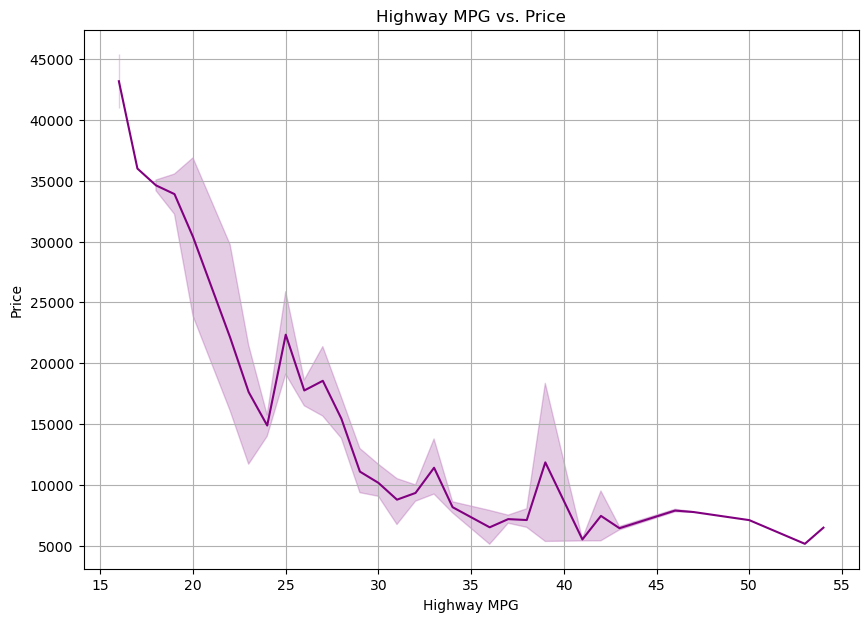

In [191]:
# Line plot for highway-mpg vs. price
plt.figure(figsize=(10, 7))
sns.lineplot(x='highway-mpg', y='price', data=df, color='purple')
plt.xlabel('Highway MPG')
plt.ylabel('Price')
plt.title('Highway MPG vs. Price')
plt.grid(True)
plt.show()


* **For some reason cars with lesser price have better highway milages.**

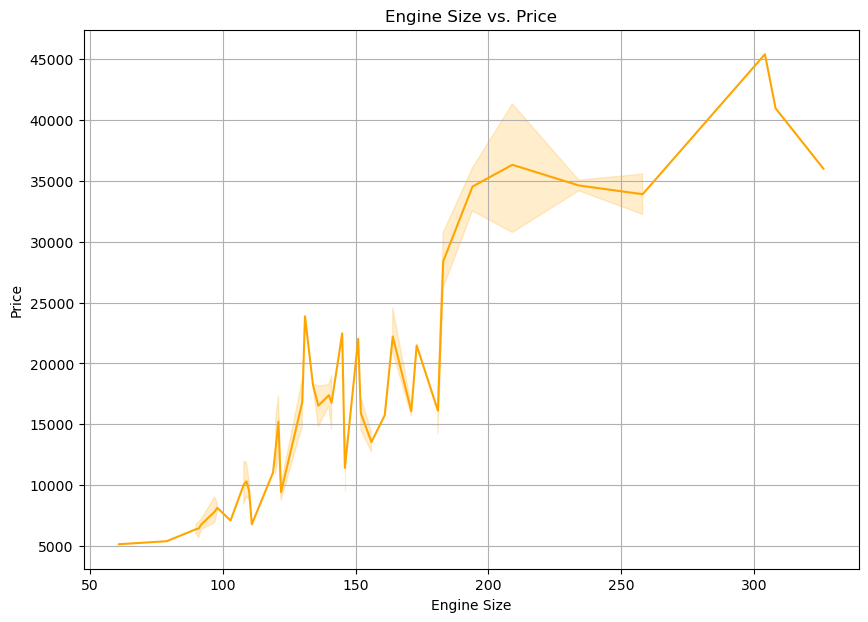

In [192]:
plt.figure(figsize=(10, 7))
sns.lineplot(x='engine-size', y='price', data=df, color='orange')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Engine Size vs. Price')
plt.grid(True)
plt.show()


* **Cars with larger and stronger engines are much more expensive than cars with smaller engines.**

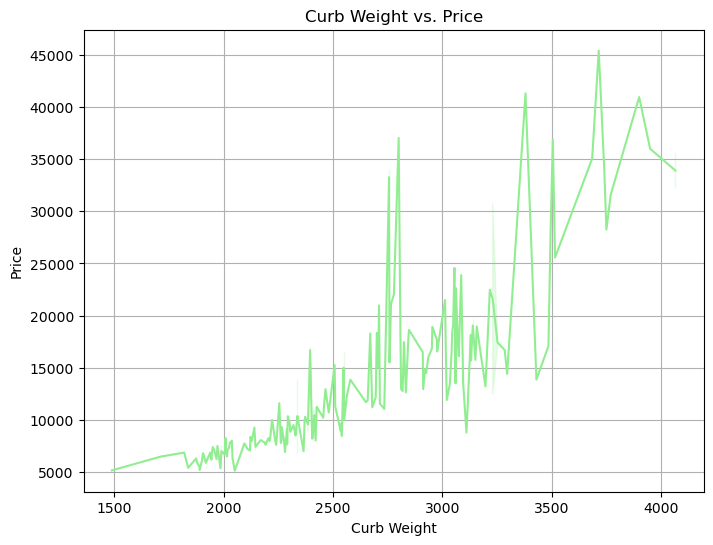

In [193]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='curb-weight', y='price', data=df ,color='lightgreen')
plt.xlabel('Curb Weight')
plt.ylabel('Price')
plt.title('Curb Weight vs. Price')
plt.grid(True)
plt.show()

* **Price unevenly increases as curb weight increases.**

In [194]:
Q1 = df['price'].quantile(0.25)  # 25th percentile
Q3 = df['price'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

upper_bound = Q3 + 1.5 * IQR

df['price'] = df['price'].apply(lambda x: min(x, upper_bound))

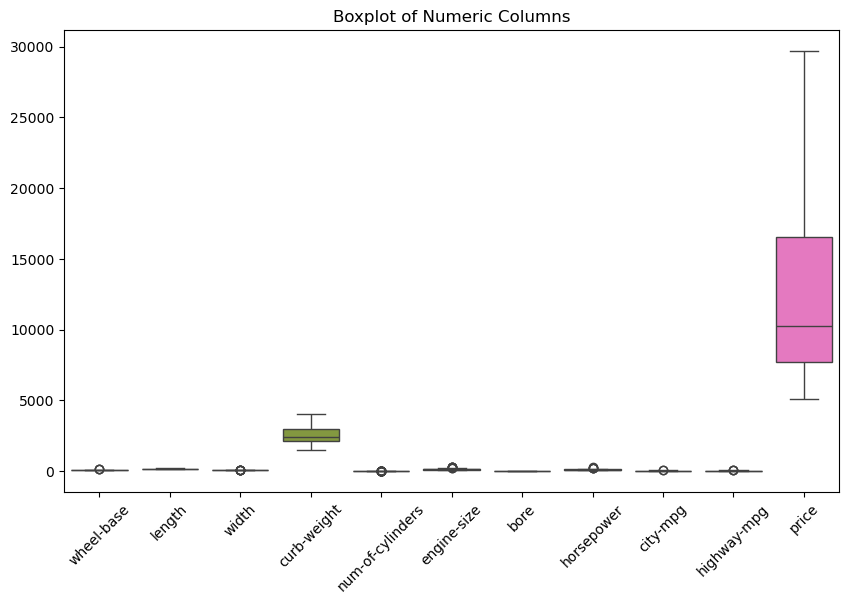

In [195]:

numeric_columns = df.select_dtypes(include=[float, int]).columns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Columns')
plt.show()


In [196]:
df.dtypes

make                 object
fuel-type            object
aspiration           object
body-style           object
drive-wheels         object
engine-location      object
wheel-base          float64
length              float64
width               float64
curb-weight           int64
engine-type          object
num-of-cylinders    float64
engine-size           int64
fuel-system          object
bore                float64
horsepower          float64
city-mpg              int64
highway-mpg           int64
price               float64
dtype: object

In [197]:
nonnumeric = ['make','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','fuel-system']

* **Defining nonnumeric columns to use an encoder for to get numeric data to fit the model.**

### **Using pd.get_dummies encoder to encode all the non numeric values before using PCA**

In [198]:
df_encoded = pd.get_dummies(df, columns=nonnumeric)


In [199]:
df_encoded.head(5)

,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,88.6,168.8,64.1,2548,4.0,130,3.47,111.0,21,27,13495.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False
1,88.6,168.8,64.1,2548,4.0,130,3.47,111.0,21,27,16500.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False
2,94.5,171.2,65.5,2823,6.0,152,2.68,154.0,19,26,16500.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False
3,99.8,176.6,66.2,2337,4.0,109,3.19,102.0,24,30,13950.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False
4,99.4,176.6,66.4,2824,5.0,136,3.19,115.0,18,22,17450.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False


* **Even though values arent 0 or 1 when PCA is applied, it considers True as 1 and False as 0**

In [200]:
df_encoded.shape

(193, 58)

In [201]:
df.shape

(193, 19)

In [202]:
df_encoded.isnull().sum()

wheel-base                0
length                    0
width                     0
curb-weight               0
num-of-cylinders          0
engine-size               0
bore                      0
horsepower                0
city-mpg                  0
highway-mpg               0
price                     0
make_alfa-romero          0
make_audi                 0
make_bmw                  0
make_chevrolet            0
make_dodge                0
make_honda                0
make_isuzu                0
make_jaguar               0
make_mazda                0
make_mercedes-benz        0
make_mercury              0
make_mitsubishi           0
make_nissan               0
make_peugot               0
make_plymouth             0
make_porsche              0
make_saab                 0
make_subaru               0
make_toyota               0
make_volkswagen           0
make_volvo                0
fuel-type_diesel          0
fuel-type_gas             0
aspiration_std            0
aspiration_turbo    

In [203]:
df_combined = pd.concat([df.drop(columns=nonnumeric).reset_index(allow_duplicates=False, drop=True), df_encoded.reset_index(allow_duplicates=False,drop=True)], axis=1)
df_combined.isnull().sum()

wheel-base                0
length                    0
width                     0
curb-weight               0
num-of-cylinders          0
engine-size               0
bore                      0
horsepower                0
city-mpg                  0
highway-mpg               0
price                     0
wheel-base                0
length                    0
width                     0
curb-weight               0
num-of-cylinders          0
engine-size               0
bore                      0
horsepower                0
city-mpg                  0
highway-mpg               0
price                     0
make_alfa-romero          0
make_audi                 0
make_bmw                  0
make_chevrolet            0
make_dodge                0
make_honda                0
make_isuzu                0
make_jaguar               0
make_mazda                0
make_mercedes-benz        0
make_mercury              0
make_mitsubishi           0
make_nissan               0
make_peugot         

* **.reset_index() is being performed before concating to match all rows properly and not create discrepancies**

In [204]:
df_combined.dropna(inplace=True)

In [205]:
df_combined = df_combined.reset_index()

In [206]:
df_combined = df_combined.drop('index',axis=1)

* **To use in streamlit app**

In [207]:
df_combined.to_csv('final_data.csv', index=False)

* **To use in streamlit app**

In [208]:
df_combined.head(5)

,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,city-mpg,highway-mpg,price,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,88.6,168.8,64.1,2548,4.0,130,3.47,111.0,21,27,13495.0,88.6,168.8,64.1,2548,4.0,130,3.47,111.0,21,27,13495.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False
1,88.6,168.8,64.1,2548,4.0,130,3.47,111.0,21,27,16500.0,88.6,168.8,64.1,2548,4.0,130,3.47,111.0,21,27,16500.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False
2,94.5,171.2,65.5,2823,6.0,152,2.68,154.0,19,26,16500.0,94.5,171.2,65.5,2823,6.0,152,2.68,154.0,19,26,16500.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False
3,99.8,176.6,66.2,2337,4.0,109,3.19,102.0,24,30,13950.0,99.8,176.6,66.2,2337,4.0,109,3.19,102.0,24,30,13950.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False
4,99.4,176.6,66.4,2824,5.0,136,3.19,115.0,18,22,17450.0,99.4,176.6,66.4,2824,5.0,136,3.19,115.0,18,22,17450.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False


In [209]:
df_combined.shape

(193, 69)

In [210]:
df.shape

(193, 19)

In [211]:
df.to_csv('streamlitdata.csv', index=False)

* **To use in streamlit app**

In [212]:
df.head(5)

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,width,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,4.0,130,mpfi,3.47,111.0,21,27,13495.0
1,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,4.0,130,mpfi,3.47,111.0,21,27,16500.0
2,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,6.0,152,mpfi,2.68,154.0,19,26,16500.0
3,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,4.0,109,mpfi,3.19,102.0,24,30,13950.0
4,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,5.0,136,mpfi,3.19,115.0,18,22,17450.0


In [213]:
X = df_combined.drop(['price'], axis=1)
y = df_combined['price']

* **Creating separate values for training and target, X is initial training and y is target.**

In [214]:
from sklearn.preprocessing import scale 
pca = PCA(n_components=0.96)
pca.fit(X)
X_reduced = pca.fit_transform(scale(X)) #To fit PCA on scaled features, just to view the PCs in a DF to view.
model = LinearRegression()

* **Importing scale to scale the feature values while fitting PCA to create less features but keeping accuracy of the dataset.**

In [215]:
column_names = [f'PC{i+1}' for i in range(X_reduced.shape[1])]
X_reduced_train_df = pd.DataFrame(X_reduced, columns=column_names)
X_reduced_train_df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31
0,0.669917,-3.460388,0.972046,-0.207002,-0.433986,-3.368049,-5.666878,-1.139034,5.725056,-1.949922,0.866678,0.529912,-2.108573,-2.478732,-0.615329,3.578991,1.168216,0.271817,0.079937,-0.723402,-1.225299,-0.010610,1.693451,0.426788,1.035534,1.285535,0.312378,0.639759,0.079503,-0.040685,0.723160
1,0.669917,-3.460388,0.972046,-0.207002,-0.433986,-3.368049,-5.666878,-1.139034,5.725056,-1.949922,0.866678,0.529912,-2.108573,-2.478732,-0.615329,3.578991,1.168216,0.271817,0.079937,-0.723402,-1.225299,-0.010610,1.693451,0.426788,1.035534,1.285535,0.312378,0.639759,0.079503,-0.040685,0.723160
2,2.026530,-3.465330,-2.035935,2.024582,0.320497,-0.199467,-4.975125,-0.036751,2.446878,-0.251357,1.191794,1.393632,-2.073461,-2.184246,-0.539122,0.788668,-0.913632,0.720022,0.911853,-0.582001,-0.561476,0.662826,-1.926904,-0.624676,-1.039253,2.612647,-0.100452,4.422643,-0.679546,-0.751822,2.916599
3,-0.383655,-0.042018,-1.644595,-0.828511,-0.512721,-0.657856,2.596280,1.032207,1.297872,0.474296,1.042127,1.898220,-0.514685,1.009640,-0.915662,0.059918,-1.679844,1.482084,0.224943,-2.078423,-1.125194,-0.809098,-0.201188,0.096251,2.008546,0.936961,0.021987,-0.345090,-0.391074,0.508650,-0.623982
4,1.976911,-1.014167,-1.209887,-1.727236,-0.922436,0.753102,2.062786,1.452501,1.369602,-0.877627,0.930384,2.083979,-1.251431,1.442890,-2.844733,-0.577848,-2.285542,1.683354,1.231503,-2.980191,-1.414000,0.155093,-0.888797,1.046799,-0.330798,-0.335949,2.420194,0.026507,0.635409,1.519460,-0.687562


* **Viewing all the PC's created.**

In [216]:
X.head(5)

,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,city-mpg,highway-mpg,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,city-mpg,highway-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,88.6,168.8,64.1,2548,4.0,130,3.47,111.0,21,27,88.6,168.8,64.1,2548,4.0,130,3.47,111.0,21,27,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False
1,88.6,168.8,64.1,2548,4.0,130,3.47,111.0,21,27,88.6,168.8,64.1,2548,4.0,130,3.47,111.0,21,27,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False
2,94.5,171.2,65.5,2823,6.0,152,2.68,154.0,19,26,94.5,171.2,65.5,2823,6.0,152,2.68,154.0,19,26,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False
3,99.8,176.6,66.2,2337,4.0,109,3.19,102.0,24,30,99.8,176.6,66.2,2337,4.0,109,3.19,102.0,24,30,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False
4,99.4,176.6,66.4,2824,5.0,136,3.19,115.0,18,22,99.4,176.6,66.4,2824,5.0,136,3.19,115.0,18,22,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False


In [217]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([26.17, 34.77, 40.37, 45.17, 49.72, 53.31, 56.67, 59.77, 62.65,
       65.38, 67.83, 70.11, 72.27, 74.42, 76.41, 78.33, 80.1 , 81.8 ,
       83.42, 84.99, 86.56, 87.98, 89.33, 90.52, 91.7 , 92.78, 93.73,
       94.6 , 95.36, 96.02, 96.6 ])

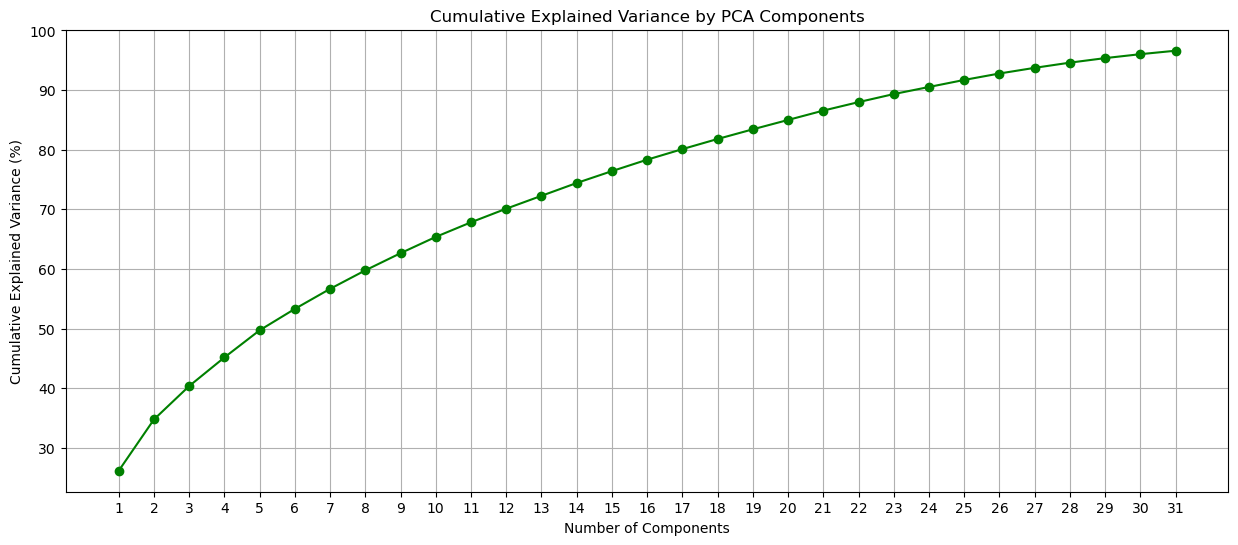

In [218]:
cumulative_variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4) * 100)

# Plotting the progression of cumulative explained variance
plt.figure(figsize=(15, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='g')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.show()

* **Checking the progression of variance as we use more and more PC's.**

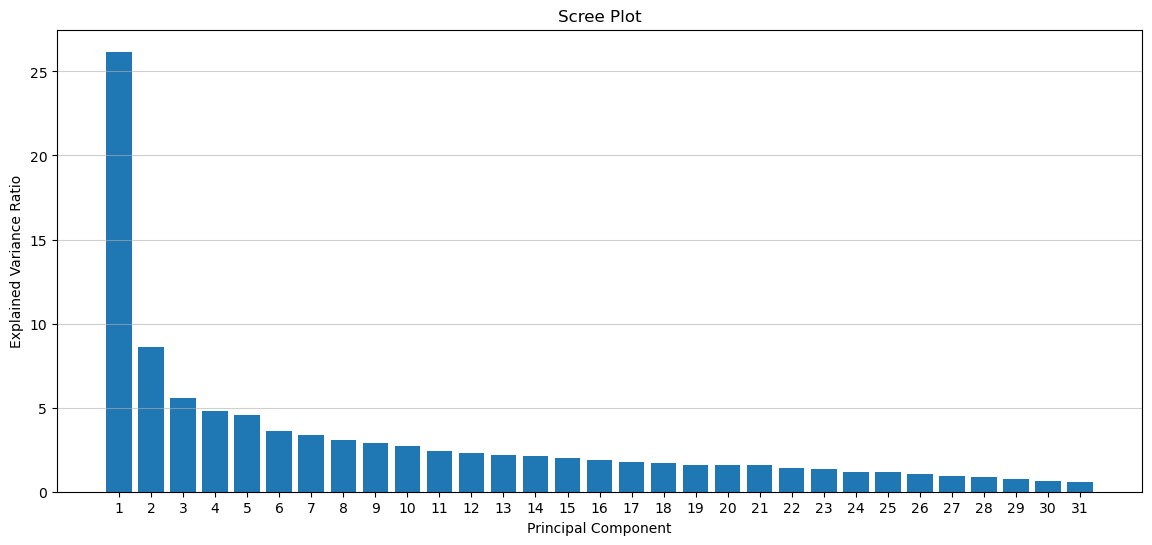

In [219]:
explained_variance = pca.explained_variance_ratio_*100

plt.figure(figsize=(14, 6))
plt.bar(np.arange(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.xticks(np.arange(1, len(explained_variance) + 1))
plt.grid(axis='y', alpha = 0.6)
plt.show()


In [220]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0) 

* **Split the training and target values equally into training and testing sets.**

In [221]:
mses = []
for i in range(1,32):
    X_reduced_train = pca.fit_transform(scale(X_train))[:,:i]
    X_reduced_test = pca.transform(scale(X_test))[:,:i] 
    model.fit(X_reduced_train, y_train)
    pred = model.predict(X_reduced_test)
    mses.append(mean_squared_error(y_test, pred))
print(len(mses))
for i in range(1,31):
    print(f'{i} : {np.sqrt(mses[i])}')

31
1 : 2834.481349110444
2 : 2818.6654321583037
3 : 2629.534555725485
4 : 2266.50617850394
5 : 2299.7296442784404
6 : 2222.634565042009
7 : 2215.976051224914
8 : 2207.690305195759
9 : 2269.4850881647703
10 : 2271.0511177134663
11 : 2271.1836603149854
12 : 2378.519633509636
13 : 2451.420051899829
14 : 2446.469909597527
15 : 2382.6068901424164
16 : 2384.735732450792
17 : 2404.5831242712966
18 : 2255.1308733530113
19 : 2228.7178196200125
20 : 2291.1218674825923
21 : 2044.064949885327
22 : 1978.9633187729637
23 : 1988.7193679197735
24 : 2092.6289113610733
25 : 2036.2923326363098
26 : 2035.4666171278989
27 : 1962.7481290943244
28 : 1960.236196025714
29 : 1960.236196025714
30 : 1960.236196025714


In [222]:
rmses = [np.sqrt(mse) for mse in mses]

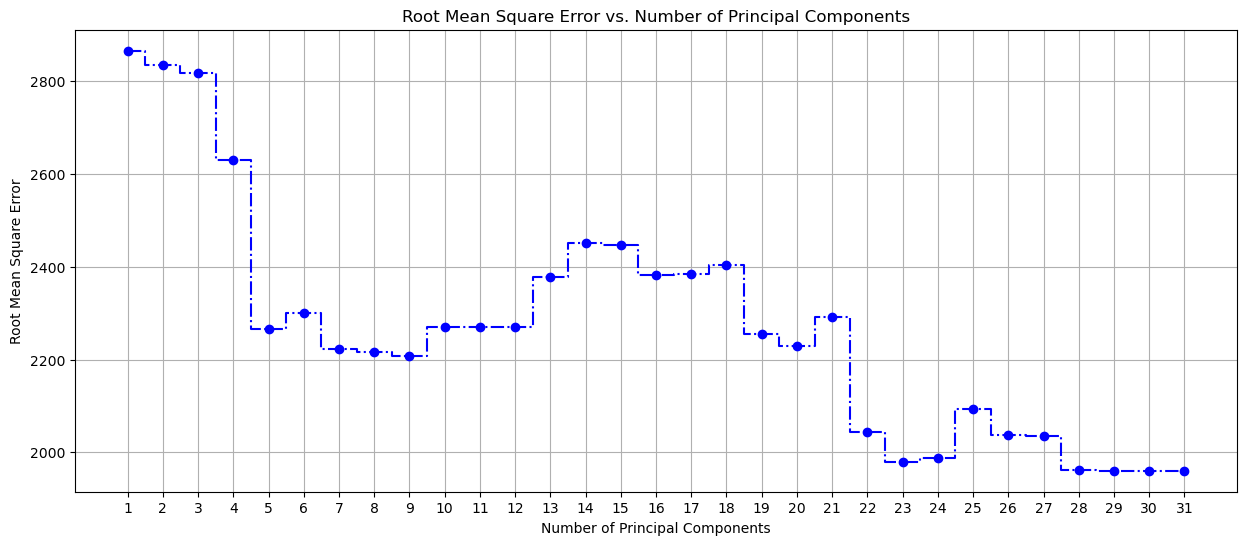

In [223]:
plt.figure(figsize=(15, 6))
#Searched for cooler seaborn.lineplot and i found this lol
plt.step(range(1, 32), rmses, where='mid', color='b', linestyle='-.', marker='o')
plt.title('Root Mean Square Error vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Root Mean Square Error')
plt.grid(True)
plt.xticks(range(1, 32))
plt.show()


* **Here we see that using the max value, 29 PC's gives the least RMSE, we use all those PC's to fit to reduced value of training and testing values.**

In [230]:
X_reduced_train = pca.fit_transform(scale(X_train))[:,:29]
X_reduced_test = pca.transform(scale(X_test))[:,:29] 

In [231]:
model.fit(X_reduced_train, y_train)

LinearRegression()

* **Fit the model based on the scaled and reduced training values and the initial target values.**

In [232]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, pred)

print(f"Mean Absolute Error: {mae}")
y_train_pred = model.predict(X_reduced_train)
y_test_pred = model.predict(X_reduced_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training Mean Squared Error: {train_mse}")
print(f"Training Root Mean Squared Error: {np.sqrt(train_mse)}")
print(f"Testing Root Mean Squared Error: {np.sqrt(test_mse)}")


Mean Absolute Error: 1593.4118531871425
Training Mean Squared Error: 2241932.6479549394
Training Root Mean Squared Error: 1497.3084678699106
Testing Root Mean Squared Error: 1960.236196025714


In [233]:
mean_pred = y_train.mean()
baseline_mse = mean_squared_error(y_test, [mean_pred] * len(y_test))
print(f"Baseline MSE (mean predictor): {baseline_mse}")

Baseline MSE (mean predictor): 44539897.859576754


* **We get the minimum MSE value to check if a model is even functioning as required or not.**

In [234]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_pred)
print(f"R-squared (test): {r2}")
r2 = r2_score(y_train, y_train_pred)
print(f"R-squared (train): {r2}")

R-squared (test): 0.9125816240729503
R-squared (train): 0.951702237371794


In [235]:
import pickle

pickle.dump(model, open('/home/smayan/Desktop/DJS-compute-tasks/DJS-compute-tasks/Task 2/Data/model.sav','wb'))